In [1]:
import sys
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import interpolate 
sys.path.append(r'C:\Chuji\Code_and_Data\MyCode')

import Circuit_Simulator 
import PulseGenerator as PG
from toolfunc import *
from toolfunc.adia_analysis import *
from toolfunc.pulse_filter import *
import scipy.optimize as sci_op
from toolfunc import DE

In [2]:
error_20ns = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_versus_gate_time\error_20ns.txt')

error_30ns = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\error_one_distor_5ns.txt')

error_40ns = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_versus_gate_time\error_40ns.txt')
error_60ns = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_versus_gate_time\error_60ns.txt')

In [3]:
error_40ns_no_coupler = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_versus_gate_time\error_40ns_no_coupler.txt')
error_60ns_no_coupler = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_versus_gate_time\error_60ns_no_coupler.txt')
error_80ns_no_coupler = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_versus_gate_time\error_80ns_no_coupler.txt')

In [6]:
# error_40ns_no_coupler_compen = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_versus_gate_time\error_40ns_no_coupler_compen.txt')
# error_60ns_no_coupler_compen = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_versus_gate_time\error_60ns_no_coupler_compen.txt')
# error_80ns_no_coupler_compen = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_versus_gate_time\error_80ns_no_coupler_compen.txt')

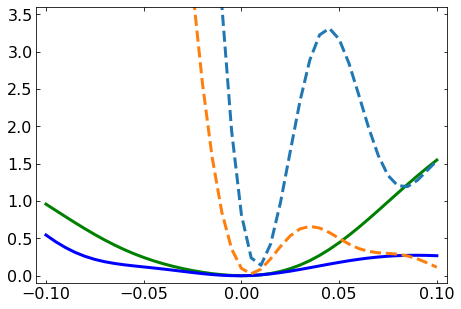

In [4]:
import matplotlib.ticker as mtick
fig = plt.figure(figsize=[7.6,4.8])
ax = fig.add_axes([0.2,0.10,0.75,0.8])

# ax.plot(np.linspace(-0.1,0.1,41),error_20ns*1,label='n=20',linewidth=3,c='r')
ax.plot(np.linspace(-0.1,0.1,41),error_30ns*100,label='n=30',linewidth=3,c='g')
ax.plot(np.linspace(-0.1,0.1,41),error_40ns*100,label='n=40',linewidth=3,c='b')


ax.plot( np.linspace(-0.05,0.1,31),error_40ns_no_coupler*100,'--',label='n=40_no_c',linewidth=3)
ax.plot( np.linspace(-0.05,0.1,31),error_60ns_no_coupler*100,'--',label='n=60_no_c',linewidth=3)
# ax.plot( np.linspace(-0.1,0.1,41),error_80ns_no_coupler*1,'--',label='n=80_no_c',linewidth=3)


ax.set_xlim([-0.105,0.105])
ax.set_ylim([-0.1,3.6])

ax.tick_params(axis='x',which='both',bottom=True,top=True,direction='in' )
ax.tick_params(axis='y',which='both',left=True,right=True,direction='in' )

ax.tick_params(labelsize=16)
# ax.set_yscale('log')

## coupling strength

In [5]:

error_12 = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_versus_coupling_strength\error_r_ic12.txt')
error_12_new = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_versus_coupling_strength\error_r_ic12_new.txt')


error_30 = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_versus_coupling_strength\error_r_ic30.txt')
error_20 = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_versus_coupling_strength\error_r_ic20.txt')

error_09 = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_versus_coupling_strength\error_r_ic09.txt')


error_18 = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\error_one_distor_5ns.txt')


Coupler_free = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_versus_coupling_strength\error_30ns_no_coupler_r12_003.txt' )
Coupler_free_05 = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\robustness_versus_coupling_strength\error_30ns_no_coupler_r12_005.txt' )

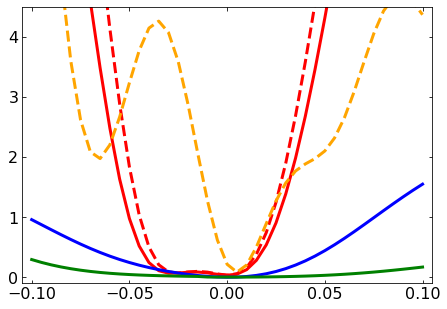

In [6]:
import matplotlib.ticker as mtick
fig = plt.figure(figsize=[7.6,4.8])
ax = fig.add_axes([0.2,0.10,0.75,0.8])

ax.plot( np.linspace(-0.1,0.1,41),error_12*100,label='n=12',linewidth=3,c='r')
ax.plot( np.linspace(-0.1,0.1,41),error_12_new*100,label='n=12',linewidth=3,c='r',linestyle='--')

ax.plot( np.linspace(-0.1,0.1,41),error_18*100,label='n=0.18',linewidth=3,c='b')
ax.plot( np.linspace(-0.1,0.1,41),error_30*100,label='n=0.3',linewidth=3,c='g')
ax.plot( np.linspace(-0.1,0.1,41),Coupler_free_05*100,'--',label='n=0.3',linewidth=3,c='orange')

ax.set_xlim([-0.105,0.105])
ax.set_ylim([-0.1,4.5])

ax.tick_params(axis='x',which='both',bottom=True,top=True,direction='in' )
ax.tick_params(axis='y',which='both',left=True,right=True,direction='in' )

ax.tick_params(labelsize=16)


In [7]:
Error_one_5ns = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\error_one_distor_5ns.txt')
Error_two_5ns = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\error_two_distor_5ns.txt')
Param_two_5ns = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\param_two_distor_5ns.txt')


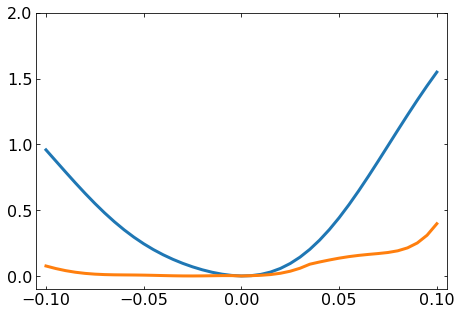

In [8]:
import matplotlib.ticker as mtick
fig = plt.figure(figsize=[7.6,4.8])
ax = fig.add_axes([0.2,0.10,0.75,0.8])
ax_inset = fig.add_axes([0.35,0.36,0.4,0.5])

ax.plot(np.linspace(-0.1,0.1,41),Error_one_5ns*100,label='n=1',linewidth=3)
ax.plot(np.linspace(-0.1,0.1,41),Error_two_5ns*100,label='n=2',linewidth=3)
ax.set_xlim([-0.105,0.105])
ax.set_ylim([-0.1,2])
# ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

# ax_inset.plot(np.linspace(0,total_len,len(flux_pulse_distor) ),flux_pulse/np.max(flux_pulse),'black',linewidth=3,linestyle='--')
# ax_inset.plot(np.linspace(0,total_len,len(flux_pulse_distor) ),flux_pulse_distor/np.max(flux_pulse),'tab:gray',linewidth=3,linestyle='-')


ax_inset.axis('off')


ax.tick_params(axis='x',which='both',bottom=True,top=True,direction='in' )
ax.tick_params(axis='y',which='both',left=True,right=True,direction='in' )

ax.tick_params(labelsize=16)
plt.tick_params(labelsize=16)
# ax.set_yscale('log')

## plot all

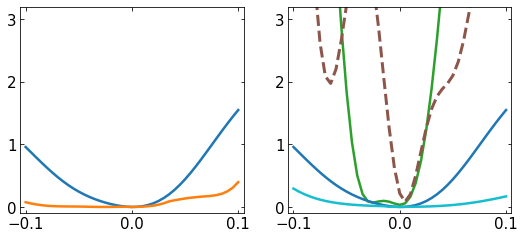

In [9]:
import matplotlib.ticker as mtick
fig = plt.figure(figsize=[8.8,3.8])
ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(122)
lw=2.5
ax1.plot(np.linspace(-0.1,0.1,41),Error_one_5ns*100,label='n=1',linewidth=lw,c='tab:blue')
ax1.plot(np.linspace(-0.1,0.1,41),Error_two_5ns*100,label='n=2',linewidth=lw,c='tab:orange')

# ax2.plot(np.linspace(-0.1,0.1,41),error_30ns*100,label='n=30',linewidth=lw,c='tab:blue')
# ax2.plot(np.linspace(-0.1,0.1,41),error_40ns*100,label='n=40',linewidth=lw,c='tab:cyan')
# ax2.plot( np.linspace(-0.05,0.1,31),error_40ns_no_coupler*100,'--',label='n=40_no_c',linewidth=lw,c='tab:pink')
# ax2.plot( np.linspace(-0.05,0.1,31),error_60ns_no_coupler*100,'--',label='n=60_no_c',linewidth=lw,c='tab:brown')

ax3.plot( np.linspace(-0.1,0.1,41),error_12_new*100,label='n=12',linewidth=lw,c='tab:green')
ax3.plot( np.linspace(-0.1,0.1,41),error_18*100,label='n=0.18',linewidth=lw,c='tab:blue')
ax3.plot( np.linspace(-0.1,0.1,41),error_30*100,label='n=0.3',linewidth=lw,c='tab:cyan')
ax3.plot( np.linspace(-0.1,0.1,41),Coupler_free_05*100,'--',label='n=0.3',linewidth=3,c='tab:brown')

ax3.set_xlim([-0.105,0.105])
ax3.set_ylim([-0.1,3.2])
# ax2.set_xlim([-0.105,0.105])
# ax2.set_ylim([-0.1,3.6])
ax1.set_xlim([-0.105,0.105])
ax1.set_ylim([-0.1,3.2])

ax1.tick_params(axis='x',which='both',bottom=True,top=True,direction='in' )
ax1.tick_params(axis='y',which='both',left=True,right=True,direction='in' )
ax1.tick_params(labelsize=15)
# ax2.tick_params(axis='x',which='both',bottom=True,top=True,direction='in' )
# ax2.tick_params(axis='y',which='both',left=True,right=True,direction='in' )
# ax2.tick_params(labelsize=15)
ax3.tick_params(axis='x',which='both',bottom=True,top=True,direction='in' )
ax3.tick_params(axis='y',which='both',left=True,right=True,direction='in' )
ax3.tick_params(labelsize=15)


In [200]:
%matplotlib qt

In [22]:
import matplotlib.ticker as mtick
fig = plt.figure(figsize=[8,6.4])
ax3 = fig.add_subplot(111)

lw=2.5

ax3.plot( np.linspace(-0.1,0.1,41),error_12_new*100,label='n=12',linewidth=lw,c='tab:green')
ax3.plot( np.linspace(-0.1,0.1,41),error_18*100,label='n=0.18',linewidth=lw,c='tab:blue')
ax3.plot( np.linspace(-0.1,0.1,41),error_30*100,label='n=0.3',linewidth=lw,c='tab:cyan')
ax3.plot( np.linspace(-0.1,0.1,41),Coupler_free_05*100,'--',label='n=0.3',linewidth=3,c='tab:red')

ax3.plot(np.linspace(-0.1,0.1,41),Error_two_5ns*100,label='n=2',linestyle='-.',linewidth=lw,c='tab:orange')

ax3.set_xlim([-0.105,0.105])
ax3.set_ylim([-0.1,3.2])


ax3.tick_params(axis='x',which='both',bottom=True,top=True,direction='in' )
ax3.tick_params(axis='y',which='both',left=True,right=True,direction='in' )
ax3.tick_params(labelsize=16)
ax3.set_xticks([-0.1,-0.05,0,0.05,0.1])

In [16]:
%matplotlib qt